### Understanding our variables

First, let's load the data file and see what columns the set contains.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('cannabis.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


We can see that there are 6 distinct columns with only one column being numerical. This might mean
that we would need to 1-hot encode a categorical variable such as 'Flavor' in order to cluster the
strains.

In [4]:
df.nunique(axis=0)

Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64

Since there are over 2300 strains and only 26 unique ratings, this implies that a majority of strains
were rated the same. For example, mutiple users might have given a strain a rating of 5 which can 
skew the average forward. We can verify this speculation by looking at the rating column.

In [5]:
df.describe()

,Rating
count,2351.000000
mean,4.310634
std,0.836394
min,0.000000
25%,4.200000
50%,4.400000
75%,4.700000
max,5.000000


Our speculation seems to be correct. Let's look at the sample data and drop the null values.

In [6]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [7]:
df.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.describe()

,Rating
count,2277.000000
mean,4.320729
std,0.821055
min,0.000000
25%,4.200000
50%,4.400000
75%,4.700000
max,5.000000


We can see that our ratings metrics don't really change much after dropping the empty values. Now we
have 2277 observations across 6 features to work with.

In [11]:
df.shape

(2277, 6)

Now, we need to 1-hot encode the categorical data in our dataframe. Both our Flavor and Effects
columns are good candidates for this. This way, we can analyze the correlations between each of these.

In [12]:
new_df = pd.concat([df.drop('Flavor', 1), df['Flavor'].str.get_dummies(sep=",")], 1)

C:\Users\samad\AppData\Local\Temp\ipykernel_10432\1407255445.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_df = pd.concat([df.drop('Flavor', 1), df['Flavor'].str.get_dummies(sep=",")], 1)
C:\Users\samad\AppData\Local\Temp\ipykernel_10432\1407255445.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_df = pd.concat([df.drop('Flavor', 1), df['Flavor'].str.get_dummies(sep=",")], 1)


In [13]:
new_df = pd.concat([new_df.drop('Effects', 1), df['Effects'].str.get_dummies(sep=",")], 1)

C:\Users\samad\AppData\Local\Temp\ipykernel_10432\3798078156.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_df = pd.concat([new_df.drop('Effects', 1), df['Effects'].str.get_dummies(sep=",")], 1)
C:\Users\samad\AppData\Local\Temp\ipykernel_10432\3798078156.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_df = pd.concat([new_df.drop('Effects', 1), df['Effects'].str.get_dummies(sep=",")], 1)


In [14]:
new_df.head()

,Strain,Type,Rating,Description,Ammonia,Apple,Apricot,Berry,Blue,Blueberry,...,Giggly,Happy,Hungry,Mouth,None,Relaxed,Sleepy,Talkative,Tingly,Uplifted
0,100-Og,hybrid,4.0,$100 OG is a 50/50 hybrid strain that packs a ...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,98-White-Widow,hybrid,4.7,The ‘98 Aloha White Widow is an especially pot...,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1024,sativa,4.4,1024 is a sativa-dominant hybrid bred in Spain...,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,13-Dawgs,hybrid,4.2,13 Dawgs is a hybrid of G13 and Chemdawg genet...,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1
4,24K-Gold,hybrid,4.6,"Also known as Kosher Tangie, 24k Gold is a 60%...",0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1


And now, we can do the same for our plant types.

In [15]:
type_dummies = pd.get_dummies(new_df.Type)
df = pd.concat([new_df, type_dummies], axis=1)
df.drop(['Type'], axis=1)

,Strain,Rating,Description,Ammonia,Apple,Apricot,Berry,Blue,Blueberry,Butter,...,Mouth,None,Relaxed,Sleepy,Talkative,Tingly,Uplifted,hybrid,indica,sativa
0,100-Og,4.0,$100 OG is a 50/50 hybrid strain that packs a ...,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,98-White-Widow,4.7,The ‘98 Aloha White Widow is an especially pot...,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1024,4.4,1024 is a sativa-dominant hybrid bred in Spain...,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,13-Dawgs,4.2,13 Dawgs is a hybrid of G13 and Chemdawg genet...,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0
4,24K-Gold,4.6,"Also known as Kosher Tangie, 24k Gold is a 60%...",0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,4.7,Zeus OG is a hybrid cross between Pineapple OG...,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2347,Zkittlez,4.6,Zkittlez is an indica-dominant mix of Grape Ap...,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2348,Zombie-Kush,5.0,Zombie Kush by Ripper Seeds comes from two dif...,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,1,0
2349,Zombie-Og,4.4,If you’re looking to transform into a flesh-ea...,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


### Analyzing relationships between the variables

Generating a heatmap will expose the relationships.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

from string import ascii_letters

<AxesSubplot:>

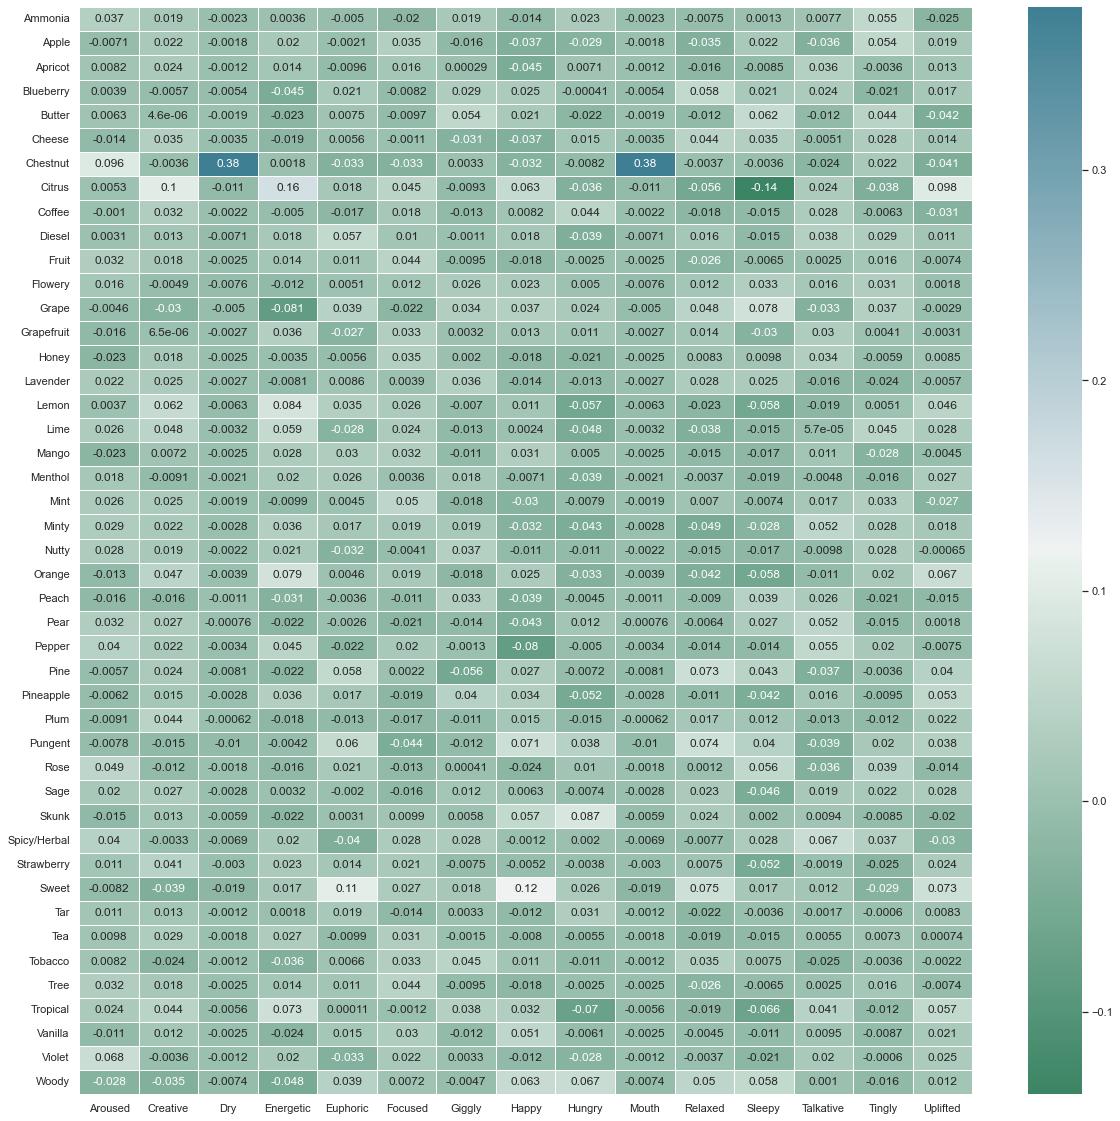

In [18]:
sns.set_theme(style='white')

cols_y = ['Ammonia','Apple', 'Apricot', 'Blueberry', 'Butter', 'Cheese', 'Chestnut', 'Citrus', 
    'Coffee', 'Diesel', 'Fruit', 'Flowery', 'Grape', 'Grapefruit', 'Honey', 'Lavender', 
    'Lemon', 'Lime', 'Mango', 'Menthol', 'Mint', 'Minty', 'Nutty', 'Orange', 'Peach', 'Pear', 
    'Pepper', 'Pine', 'Pineapple', 'Plum', 'Pungent', 'Rose', 'Sage', 'Skunk', 'Spicy/Herbal', 
    'Strawberry', 'Sweet', 'Tar', 'Tea', 'Tobacco', 'Tree', 'Tropical', 'Vanilla', 'Violet', 'Woody'
]
cols_x = ['Aroused', 'Creative', 'Dry', 'Energetic', 'Euphoric', 'Focused', 'Giggly', 'Happy', 
    'Hungry', 'Mouth', 'Relaxed', 'Sleepy', 'Talkative', 'Tingly', 'Uplifted'
]

corr = df[cols_y + cols_x].corr()

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(150, 220, as_cmap=True)
sns.heatmap(corr.loc[cols_y, cols_x], cmap=cmap, linewidths=0.5, annot=True)